# SALMON - Paper Results

This notebook contains all of the code used to generate the results seen in the paper.

Code used in the paper will be displayed here in corresponding sections.

Toggle `DATAFRAME_AS_LATEX` to showcase resulting `DataFrame` objects as LaTeX or as a native notebook rendering.

Toggle `SAVE_PLOTS` to enable/disable overwriting renderings in `./paper_plots`.

In [54]:
%matplotlib inline

DATAFRAME_AS_LATEX = True  
SAVE_PLOTS = True

def print_dataframe(df, name):
    if "." not in name:
        name += ".tex"
    name = "./paper_outputs/tables/" + name
    if DATAFRAME_AS_LATEX:
        latex_output = df.to_latex()
        print(latex_output)
        with open(name, "w") as f:
            f.write(latex_output)
    else:
        print(df)
        
def handle_plot(fig, name, **kwargs):
    if SAVE_PLOTS:
        if "." not in name:
            name += ".png"
        name = "./paper_outputs/plots/" + name
        fig.savefig(name, dpi=150, bbox_inches="tight", **kwargs)
    return

## Section 1.

_no SALMON specific code used_

## Section 2.

In [55]:
from salmon import *
import pandas as pd

# shuffle for a good representative 'head' to showcase dataset
full_data = pd.read_csv("AmesHousing.csv").sample(frac=1, random_state=12312).reset_index(drop=True)  
full_data = full_data.drop([2438, 1989, 1134, 2775]).reset_index(drop=True)
full_data = full_data.drop([442, 1671]).reset_index(drop=True) # Dropping some extreme outliers

In [56]:
data = full_data[["SalePrice"]].copy()
data["HouseStyle"] =  full_data["House Style"].apply(lambda x: x.replace("Story", " Story") if x in set(["1Story", "2Story",]) else "Other")
data["SqFt"] = full_data["Gr Liv Area"]
data["Fireplace"] = full_data["Fireplace Qu"].apply(lambda x: "No" if pd.isna(x) else "Yes")
print_dataframe(data.head(), "data_head")

\begin{tabular}{lrlrl}
\toprule
{} &  SalePrice & HouseStyle &  SqFt & Fireplace \\
\midrule
0 &     162000 &    2 Story &  1400 &        No \\
1 &     195000 &    2 Story &  1660 &        No \\
2 &     164000 &      Other &  1646 &       Yes \\
3 &     417500 &    1 Story &  2464 &       Yes \\
4 &     186800 &    1 Story &  1400 &        No \\
\bottomrule
\end{tabular}



In [57]:
x = Q("SqFt")
y = Q("SalePrice")
simple_model = LinearModel(x, y)
print(simple_model)

SalePrice ~ 1+SqFt


In [58]:
no_intercept_model = LinearModel(x - 1, y) 
no_intercept_model = LinearModel(x, y, intercept=False)
print(no_intercept_model)

SalePrice ~ SqFt


In [59]:
print_dataframe(simple_model.fit(data), name="simple_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &           SE &          t &         p &      2.5\% CI &     97.5\% CI \\
\midrule
SqFt      &    118.520467 &     2.067507 &  57.325304 &  0.000000 &   114.466548 &   122.574385 \\
Intercept &   3614.330218 &  3253.949595 &   1.110752 &  0.266767 & -2765.936642 &  9994.597077 \\
\bottomrule
\end{tabular}



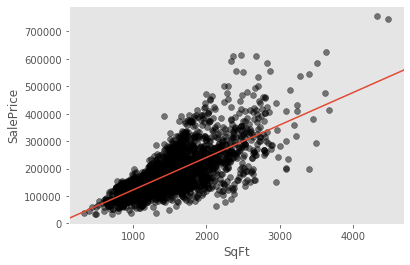

In [60]:
handle_plot(simple_model.plot(), name="simple_model_output")

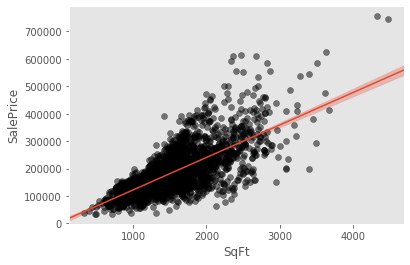

In [61]:
alpha_val = 0.05
handle_plot(simple_model.plot(confidence_band=alpha_val), name="simple_model_output_conf_band")

In [62]:
simple_log_model = LinearModel(Q("SqFt"), Log(Q("SalePrice")))
print(simple_log_model)

log(SalePrice) ~ 1+SqFt


In [63]:
print_dataframe(simple_log_model.fit(data), name="simple_log_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &        SE &           t &    p &    2.5\% CI &   97.5\% CI \\
\midrule
SqFt      &      0.000591 &  0.000011 &   55.961889 &  0.0 &   0.000570 &   0.000611 \\
Intercept &     11.139123 &  0.016610 &  670.622186 &  0.0 &  11.106554 &  11.171691 \\
\bottomrule
\end{tabular}



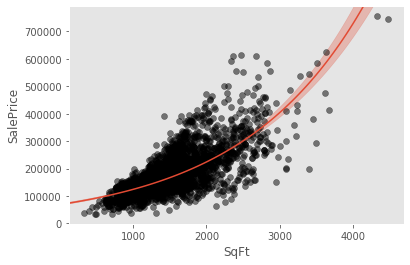

In [64]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val), name="simple_log_model_output")

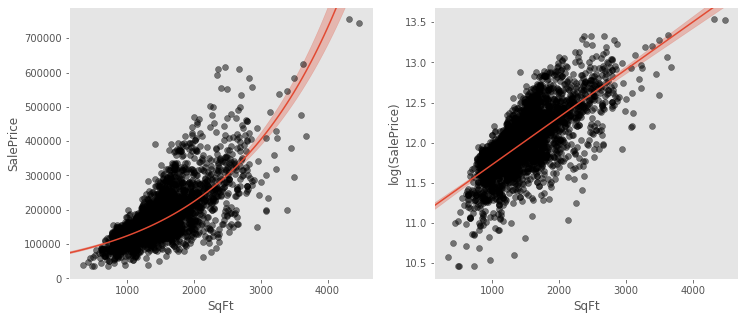

In [65]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="simple_log_model_both_outputs")

In [66]:
poly_model = LinearModel(Poly(Q("SqFt"), 2), Log(Q("SalePrice")))
# Poly(Q("SqFt"), 2) is equivalent to Q("SqFt") + Q("SqFt") ** 2
print(poly_model)

log(SalePrice) ~ 1+SqFt+SqFt^2


In [67]:
print_dataframe(poly_model.fit(data), name="poly_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &            SE &           t &             p &       2.5\% CI &      97.5\% CI \\
\midrule
SqFt      &  9.989324e-04 &  4.602783e-05 &   21.702790 &  5.928428e-97 &  9.086821e-04 &  1.089183e-03 \\
SqFt\textasciicircum 2    & -1.180140e-07 &  1.295845e-08 &   -9.107110 &  1.528959e-19 & -1.434226e-07 & -9.260539e-08 \\
Intercept &  1.082074e+01 &  3.860807e-02 &  280.271392 &  0.000000e+00 &  1.074503e+01 &  1.089644e+01 \\
\bottomrule
\end{tabular}



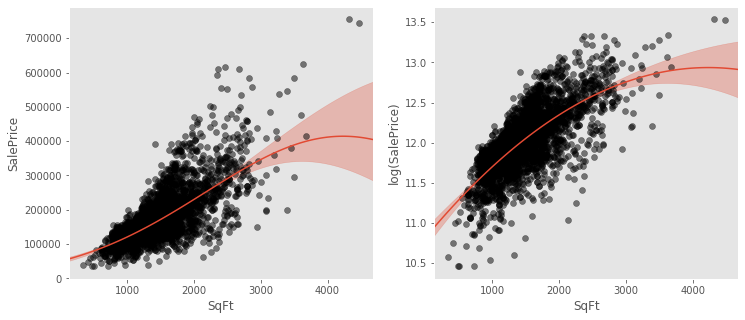

In [68]:
handle_plot(poly_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="poly_model_outputs")

In [69]:
simple_cat_model = LinearModel(
    C("HouseStyle") + C("Fireplace"), 
    Log(Q("SalePrice")),
)
print(simple_cat_model)

log(SalePrice) ~ 1+Fireplace+HouseStyle


In [70]:
print_dataframe(simple_cat_model.fit(data), name="simple_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &        SE &            t &              p &    2.5\% CI &   97.5\% CI \\
\midrule
Fireplace\{Yes\}      &      0.396611 &  0.012444 &    31.872587 &  1.457736e-191 &   0.372211 &   0.421010 \\
HouseStyle\{2 Story\} &      0.105800 &  0.014347 &     7.374366 &   2.140001e-13 &   0.077669 &   0.133932 \\
HouseStyle\{Other\}   &     -0.150002 &  0.016382 &    -9.156302 &   9.830838e-20 &  -0.182125 &  -0.117880 \\
Intercept           &     11.816640 &  0.010510 &  1124.294892 &   0.000000e+00 &  11.796031 &  11.837248 \\
\bottomrule
\end{tabular}



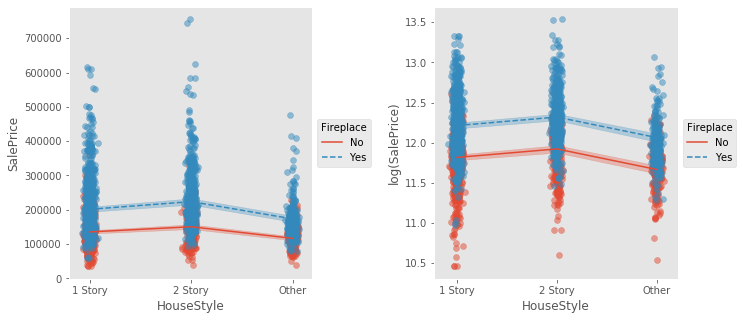

In [71]:
handle_plot(simple_cat_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="simple_cat_model_output")

In [72]:
house, fire = C("HouseStyle"), C("Fireplace")
interaction_model = LinearModel(
        house + fire + house * fire, 
        Log(Q("SalePrice")))
print(interaction_model)

log(SalePrice) ~ (Fireplace)(HouseStyle)+1+Fireplace+HouseStyle


In [73]:
print_dataframe(interaction_model.fit(data), name="interaction_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &        SE &           t &              p &    2.5\% CI &   97.5\% CI \\
\midrule
Fireplace\{Yes\}                        &      0.434731 &  0.017302 &   25.126738 &  2.725076e-126 &   0.400806 &   0.468655 \\
(HouseStyle\{2 Story\})(Fireplace\{Yes\}) &     -0.019032 &  0.028864 &   -0.659348 &   5.097244e-01 &  -0.075628 &   0.037565 \\
(HouseStyle\{Other\})(Fireplace\{Yes\})   &     -0.163845 &  0.032713 &   -5.008486 &   5.812525e-07 &  -0.227988 &  -0.099701 \\
HouseStyle\{2 Story\}                   &      0.112267 &  0.021678 &    5.178767 &   2.385385e-07 &   0.069761 &   0.154774 \\
HouseStyle\{Other\}                     &     -0.073991 &  0.022301 &   -3.317893 &   9.181179e-04 &  -0.117717 &  -0.030264 \\
Intercept                             &     11.798470 &  0.011945 &  987.746537 &   0.000000e+00 &  11.775049 &  11.821891 \\
\bottomrule
\end{tabular}



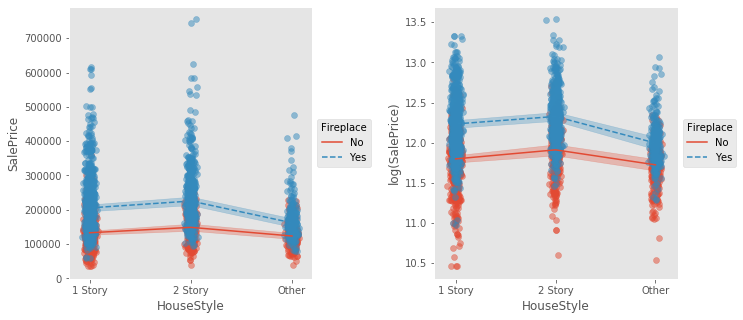

In [74]:
handle_plot(interaction_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="interaction_model_output")

In [75]:
house, fire, sqft = C("HouseStyle"), C("Fireplace"), Q("SqFt")
quant_cat_model = LinearModel(
        house + fire + house * fire + sqft, 
        Log(Q("SalePrice")))
print(quant_cat_model)

log(SalePrice) ~ (Fireplace)(HouseStyle)+1+Fireplace+HouseStyle+SqFt


In [76]:
print_dataframe(quant_cat_model.fit(data), name="quant_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &        SE &           t &             p &    2.5\% CI &   97.5\% CI \\
\midrule
Fireplace\{Yes\}                        &      0.216027 &  0.013679 &   15.792453 &  5.673223e-54 &   0.189205 &   0.242849 \\
(HouseStyle\{2 Story\})(Fireplace\{Yes\}) &     -0.038915 &  0.021535 &   -1.807043 &  7.085850e-02 &  -0.081141 &   0.003311 \\
(HouseStyle\{Other\})(Fireplace\{Yes\})   &     -0.147820 &  0.024405 &   -6.057022 &  1.564339e-09 &  -0.195672 &  -0.099968 \\
SqFt                                  &      0.000573 &  0.000012 &   48.240006 &  0.000000e+00 &   0.000550 &   0.000596 \\
HouseStyle\{2 Story\}                   &     -0.152415 &  0.017076 &   -8.925505 &  7.671590e-19 &  -0.185898 &  -0.118932 \\
HouseStyle\{Other\}                     &     -0.153519 &  0.016716 &   -9.183714 &  7.682701e-20 &  -0.186296 &  -0.120742 \\
Intercept                             &     11.150322 &  0.016122 &  691.626140 &  0.000000e+00 &  11

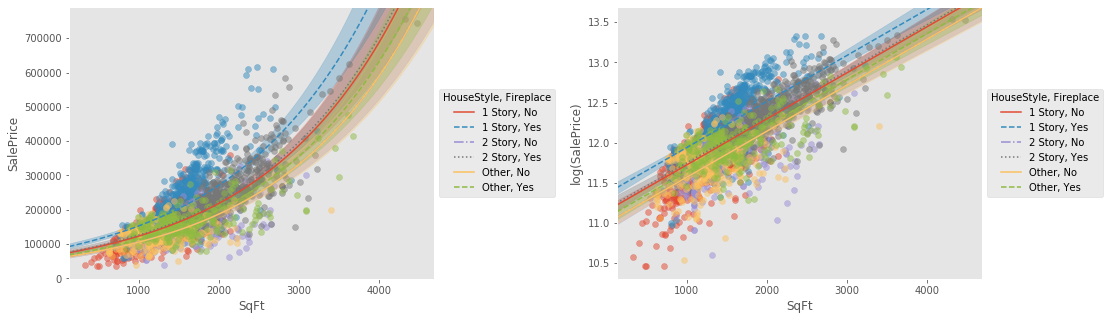

In [77]:
handle_plot(quant_cat_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(18,5)), name="quant_cat_model_output")

In [78]:
print(cat_vars * sqft)

(Fireplace)(HouseStyle)(SqFt)+(Fireplace)(SqFt)+(HouseStyle)(SqFt)


In [79]:
house, fire, sqft = C("HouseStyle"), C("Fireplace"), Q("SqFt")
cat_vars = house + fire + house * fire
full_model = LinearModel(
        cat_vars + sqft + cat_vars * sqft,  # TODO: Look into error when it is sqft * cat_vars 
        Log(Q("SalePrice")))
print(full_model)

log(SalePrice) ~ (Fireplace)(HouseStyle)+(Fireplace)(HouseStyle)(SqFt)+(Fireplace)(SqFt)+(HouseStyle)(SqFt)+1+Fireplace+HouseStyle+SqFt


In [80]:
print_dataframe(full_model.fit(data), name="full_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &        SE &           t &              p &    2.5\% CI &   97.5\% CI \\
\midrule
(SqFt)(Fireplace\{Yes\})                      &      0.000060 &  0.000038 &    1.573890 &   1.156216e-01 &  -0.000015 &   0.000135 \\
(SqFt)(HouseStyle\{2 Story\})                 &     -0.000285 &  0.000046 &   -6.260282 &   4.408411e-10 &  -0.000375 &  -0.000196 \\
(SqFt)(HouseStyle\{Other\})                   &     -0.000498 &  0.000049 &  -10.147506 &   8.417273e-24 &  -0.000595 &  -0.000402 \\
Fireplace\{Yes\}                              &      0.059246 &  0.051302 &    1.154866 &   2.482400e-01 &  -0.041345 &   0.159837 \\
(HouseStyle\{2 Story\})(Fireplace\{Yes\})       &     -0.076586 &  0.088643 &   -0.863979 &   3.876704e-01 &  -0.250396 &   0.097224 \\
(HouseStyle\{Other\})(Fireplace\{Yes\})         &     -0.023645 &  0.087169 &   -0.271257 &   7.862128e-01 &  -0.194565 &   0.147274 \\
(HouseStyle\{2 Story\})(SqFt)(Fireplace\{Yes\}) &      0

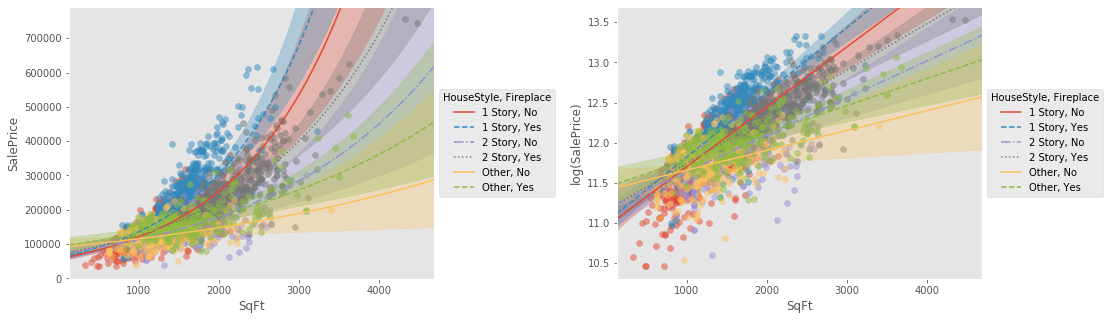

In [81]:
handle_plot(full_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(18,5)), name="full_model_output")

In [82]:
new_data = data.head()
print_dataframe(full_model.predict(new_data), name="full_model_predictions")

\begin{tabular}{lr}
\toprule
{} &  Predicted log(SalePrice) \\
\midrule
0 &                 11.822051 \\
1 &                 11.941762 \\
2 &                 12.003081 \\
3 &                 13.000002 \\
4 &                 11.999181 \\
\bottomrule
\end{tabular}



In [83]:
print_dataframe(full_model.predict(new_data, prediction_interval=alpha_val), name="full_model_predictions_interval")

\begin{tabular}{lrrr}
\toprule
{} &  Predicted log(SalePrice) &       2.5\% &      97.5\% \\
\midrule
0 &                 11.822051 &  11.356338 &  12.287764 \\
1 &                 11.941762 &  11.476213 &  12.407311 \\
2 &                 12.003081 &  11.537366 &  12.468795 \\
3 &                 13.000002 &  12.532570 &  13.467433 \\
4 &                 11.999181 &  11.533789 &  12.464574 \\
\bottomrule
\end{tabular}



## Section 3

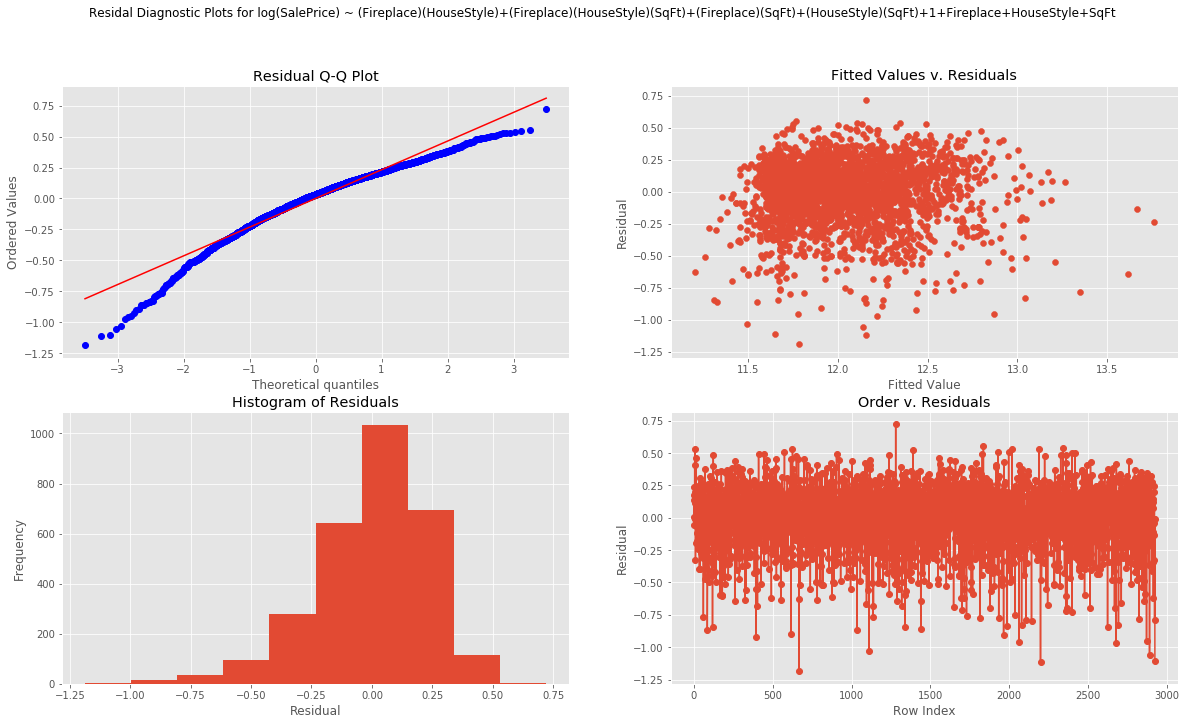

In [84]:
handle_plot(full_model.residual_diagnostic_plots(figsize=(20, 11))[0], name="full_model_resid_diagnostics")

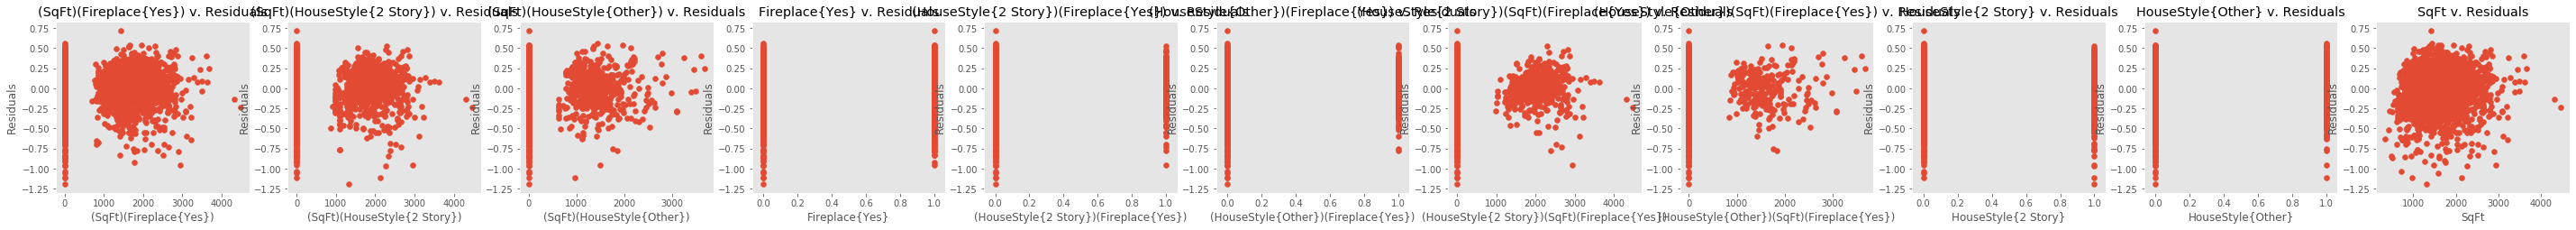

In [85]:
handle_plot(full_model.residual_plots(figsize=(50, 3.5))[0], name="full_model_residual_plots")

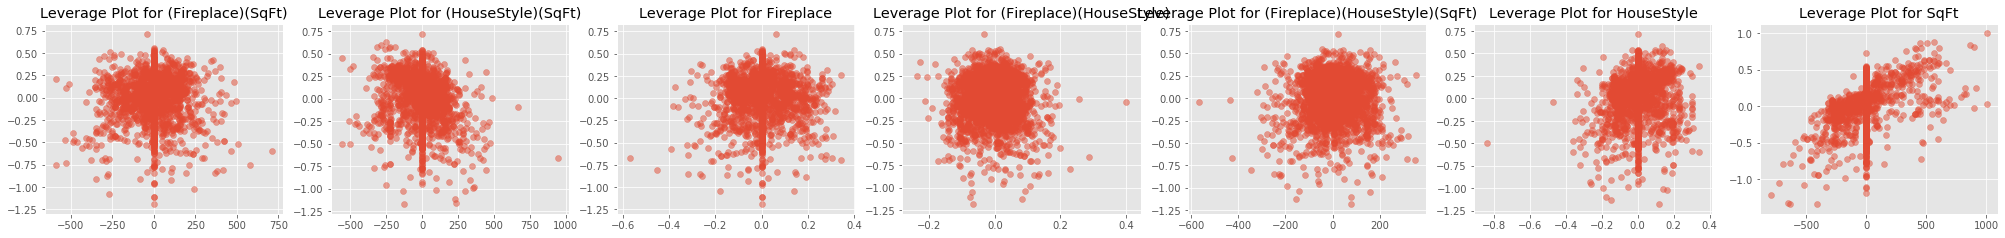

In [86]:
handle_plot(full_model.partial_plots(figsize=(35, 3.5))[0], name="full_model_partial_plots")

In [33]:
full_model.r_squared(adjusted=False)

0.652748378553996

In [87]:
print_dataframe(anova(full_model), name="full_model_anova")

\begin{tabular}{lrrlll}
\toprule
{} &    DF &      Adj\_SS &     Adj\_MS &  F\_Value &      P\_Value \\
\midrule
Regression                       &    11 &  309.578129 &    28.1435 &  500.765 &  1.11022e-16 \\
>> (Fireplace)(SqFt)             &     1 &  145.781876 &    145.782 &  2593.94 &  1.11022e-16 \\
>> (HouseStyle)(SqFt)            &     2 &  139.758287 &    69.8791 &  1243.38 &  1.11022e-16 \\
>> Fireplace                     &     1 &  145.846137 &    145.846 &  2595.09 &  1.11022e-16 \\
>> (Fireplace)(HouseStyle)       &     2 &  145.879108 &    72.9396 &  1297.84 &  1.11022e-16 \\
>> (Fireplace)(HouseStyle)(SqFt) &     2 &  145.856503 &    72.9283 &  1297.63 &  1.11022e-16 \\
>> HouseStyle                    &     2 &  142.801367 &    71.4007 &  1270.45 &  1.11022e-16 \\
>> SqFt                          &     1 &  109.314801 &    109.315 &  1945.07 &  1.11022e-16 \\
Error                            &  2912 &  163.657036 &  0.0562009 &          &              \\
Total         

In [88]:
print_dataframe(anova(full_model, quant_cat_model), name="anova_comparison")

\begin{tabular}{lrrllll}
\toprule
{} &  Residual DF &  Explained SS & DF & Residual SS &   F\_Value &   P\_Value \\
\midrule
Reduced Model &         2917 &    294.219616 &    &             &           &           \\
Full Model    &         2912 &    309.578129 &  5 &     15.3585 &  0.206461 &  0.952863 \\
\bottomrule
\end{tabular}



## Section 4

## Section 5

## Section 6

## Appendix A.1

## Appendix B.1

## Appendix B.2 